In [1]:
import tensorflow
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x = pd.read_csv("../class_11/fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print X.shape,y.shape

(10000, 784) (10000,)


In [3]:
# to convert labels to one hot
y = np_utils.to_categorical(y)
y.shape

(10000, 10)

In [4]:
y[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
X_train = X[:8000,:]
Y_train = y[:8000,:]
X_val = X[8000:,:]
Y_val = y[8000:,:]

print X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

(8000, 784) (8000, 10) (2000, 784) (2000, 10)


In [6]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
hist = model.fit(X_train,Y_train,batch_size=256,epochs=50,verbose=2,validation_data=(X_val,Y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 1s - loss: 2.1635 - acc: 0.2080 - val_loss: 1.9800 - val_acc: 0.2930
Epoch 2/50
 - 0s - loss: 1.8369 - acc: 0.3762 - val_loss: 1.7028 - val_acc: 0.4935
Epoch 3/50
 - 0s - loss: 1.5875 - acc: 0.5632 - val_loss: 1.4825 - val_acc: 0.6120
Epoch 4/50
 - 0s - loss: 1.3882 - acc: 0.6243 - val_loss: 1.3134 - val_acc: 0.6370
Epoch 5/50
 - 1s - loss: 1.2362 - acc: 0.6458 - val_loss: 1.1750 - val_acc: 0.6515
Epoch 6/50
 - 1s - loss: 1.1224 - acc: 0.6596 - val_loss: 1.0765 - val_acc: 0.6700
Epoch 7/50
 - 0s - loss: 1.0369 - acc: 0.6779 - val_loss: 1.0022 - val_acc: 0.6850
Epoch 8/50
 - 0s - loss: 0.9696 - acc: 0.6949 - val_loss: 0.9387 - val_acc: 0.7030
Epoch 9/50
 - 0s - loss: 0.9155 - acc: 0.7092 - val_loss: 0.8904 - val_acc: 0.7165
Epoch 10/50
 - 0s - loss: 0.8731 - acc: 0.7198 - val_loss: 0.8572 - val_acc: 0.7115
Epoch 11/50
 - 0s - loss: 0.8379 - acc: 0.7285 - val_loss: 0.8199 - val_acc: 0.7230
Epoch 12/50
 - 0s - loss: 0.8087 - ac

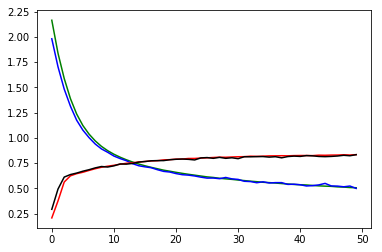

In [9]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()